# BEV PROJECT 

## PIPELINE STAGES: 

### 1- [Wasserstien](https://github.com/AhmedYousriSobhi/W-Stereo-Disp) 
- Part I --> input: Left/Right image + Calib , output : Depthmap.
- Part II --> input Depthmap , output : points clouds + Planes.

### 2- [Avod](https://github.com/AhmedYousriSobhi/avod) 
- --> input: Images + points clouds + planes + calib , output : labels.

### 3- Detection Format Covertion
- covert from avod output prediction format to kitti label format, [Guide](https://github.com/kujason/avod/wiki/Data-Formats)

### 4- [Kitti Visiualize](https://github.com/AhmedYousriSobhi/kitti_object_vis.git)
- --> input: labels converted + image_2 + calib+ point clouds , output: BEV

References:

[PSMNET](https://github.com/JiaRenChang/PSMNet)
[Avod PAPER](https://arxiv.org/abs/1712.02294)

In [1]:
!git clone https://github.com/oforomar/BEV-Project.git --recurse-submodules
%cd BEV-Project

Cloning into 'BEV-Project'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (107/107), done.
remote: Total 117 (delta 67), reused 28 (delta 9), pack-reused 0
Receiving objects: 100% (117/117), 2.00 MiB | 11.33 MiB/s, done.
Resolving deltas: 100% (67/67), done.
Submodule 'W-Stereo-Disp' (https://github.com/AhmedYousriSobhi/W-Stereo-Disp.git) registered for path 'W-Stereo-Disp'
Submodule 'avod' (https://github.com/AhmedYousriSobhi/avod.git) registered for path 'avod'
Submodule 'kitti_object_vis' (https://github.com/AhmedYousriSobhi/kitti_object_vis.git) registered for path 'kitti_object_vis'
Cloning into '/content/BEV-Project/W-Stereo-Disp'...
remote: Enumerating objects: 311, done.        
remote: Counting objects: 100% (47/47), done.        
remote: Compressing objects: 100% (7/7), done.        
remote: Total 311 (delta 42), reused 40 (delta 40), pack-reused 264        
Receiving objects: 100% (311/311), 91.80 

In [2]:
# Check current Directory, Make sure you stand in The project Folder "repo folder".
!pwd

/content/BEV-Project


# Initialization Step

## Dataset Download

If you have already KITTI dataset, So you can skip next Two cells. Make sure the dataset Folder is liked the following:
>KITTI/ <br>
>> val.txt <br>
 testing/ <br>
>>> image_2/ <br>
 image_3/ <br>
 calib/ <br>


#### You can skip this cell if you have already downloaded the dataset.

In [3]:
# install awscli "AWS Command Line" for python
!pip install awscli -qq 

     |████████████████████████████████| 3.9 MB 8.3 MB/s 
     |████████████████████████████████| 9.1 MB 54.6 MB/s 
     |████████████████████████████████| 79 kB 9.5 MB/s 
     |████████████████████████████████| 636 kB 75.7 MB/s 
     |████████████████████████████████| 548 kB 78.4 MB/s 
     |████████████████████████████████| 140 kB 61.9 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
requests 2.23.0 requires urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you have urllib3 1.26.12 which is incompatible.


In [4]:
!pip install h5py
!pip install typing-extensions
!pip install wheel

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### You can skip this cell if you have already downloaded the dataset.

In [5]:
# Run dataset kitti download script.
!chmod +x ./W-Stereo-Disp/scripts/download_kitti.sh
! ./W-Stereo-Disp/scripts/download_kitti.sh

Streaming output truncated to the last 5000 lines.
 extracting: testing/calib/004249.txt  
 extracting: testing/calib/001148.txt  
 extracting: testing/calib/002994.txt  
 extracting: testing/calib/002335.txt  
 extracting: testing/calib/000689.txt  
 extracting: testing/calib/002782.txt  
 extracting: testing/calib/004242.txt  
 extracting: testing/calib/003661.txt  
 extracting: testing/calib/003118.txt  
 extracting: testing/calib/005423.txt  
 extracting: testing/calib/004621.txt  
 extracting: testing/calib/004649.txt  
 extracting: testing/calib/004048.txt  
 extracting: testing/calib/000601.txt  
 extracting: testing/calib/006901.txt  
 extracting: testing/calib/001307.txt  
 extracting: testing/calib/006471.txt  
 extracting: testing/calib/006163.txt  
 extracting: testing/calib/007280.txt  
 extracting: testing/calib/006758.txt  
 extracting: testing/calib/006919.txt  
 extracting: testing/calib/007000.txt  
 extracting: testing/calib/003371.txt  
 extracting: testing/calib/00

#### Val.txt should contain all the image indexed which will be used as input in the pipeline.

In [6]:
# val.txt file contain the idx of the images from the dataset, which you want to be used in Inferance.
!mv val.txt KITTI/

#### Download all requirements libararies needed For the pipeline.

In [7]:
# # Install Python libararies Required.
!pip3 install -r requirements.txt -qq

     |████████████████████████████████| 40 kB 4.5 MB/s 
     |████████████████████████████████| 125 kB 12.5 MB/s 
     |████████████████████████████████| 2.1 MB 50.1 MB/s 
     |████████████████████████████████| 1.3 MB 53.0 MB/s 
     |████████████████████████████████| 209 kB 20.2 MB/s 
     |████████████████████████████████| 58 kB 6.4 MB/s 
     |████████████████████████████████| 92.6 MB 1.5 MB/s 
     |████████████████████████████████| 19.8 MB 29.9 MB/s 
     |████████████████████████████████| 3.2 MB 41.0 MB/s 
     |████████████████████████████████| 367 kB 67.2 MB/s 
     |████████████████████████████████| 50 kB 7.4 MB/s 
     |████████████████████████████████| 127 kB 72.8 MB/s 
     |████████████████████████████████| 229 kB 73.0 MB/s 
     |████████████████████████████████| 280 kB 71.0 MB/s 
     |████████████████████████████████| 1.3 MB 47.7 MB/s 
     |████████████████████████████████| 5.1 MB 49.5 MB/s 
     |████████████████████████████████| 1.5 MB 54.6 MB/s 
     |█████████████

In [8]:
!pip install vtk==9.0.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 103.4 MB 76 kB/s 
  Attempting uninstall: vtk
    Found existing installation: vtk 9.1.0
    Uninstalling vtk-9.1.0:
      Successfully uninstalled vtk-9.1.0


In [9]:
!pip install mayavi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached mayavi-4.8.0.tar.gz (19.8 MB)
  Created wheel for mayavi: filename=mayavi-4.8.0-cp37-cp37m-linux_x86_64.whl size=14640646 sha256=50dd107e3284fd39997f5212d3770c7d95bb6e5ee953239cb98f5f58a9acf257
  Stored in directory: /root/.cache/pip/wheels/3f/96/65/4fb0f566292c2cf4a816bb4ed95538781929269324f245199d
Successfully built mayavi


# Stage-1 | Wasserstien Disparity Github 
- [Github Forked link](https://github.com/AhmedYousriSobhi/W-Stereo-Disp.git)
- You don't have to clone it, it is already cloned.

####  Download Checkpoints for Pretrained Model.

In [10]:
"""
# Downloading Checkpoint and Best Model pre-trained, to be used as inferance.
# Checkpoints should be located inside floder --> W-Stereo-Disp/checkpoints/
# Steps:
#      1-Create a folder in W-Stereo-Disp folder
#      2-Download the files.
#      3-Return to main project folder.
"""
%cd W-Stereo-Disp/
!mkdir checkpoints
%cd checkpoints/

# To Download checkpoint.pth.tar, model_best.pth.tar files
# checkpoint.pth.tar
!gdown --id 1K110r6n0kg_j3Xq6ThicwOXpYmiBjQ77
# model_best.pth.tar
!gdown --id 10GKd_H4qpdG4PxPVQ-Cjz9pfmdn78B9o
%cd ../..

/content/BEV-Project/W-Stereo-Disp
/content/BEV-Project/W-Stereo-Disp/checkpoints
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1K110r6n0kg_j3Xq6ThicwOXpYmiBjQ77
To: /content/BEV-Project/W-Stereo-Disp/checkpoints/checkpoint.pth.tar
100% 64.0M/64.0M [00:00<00:00, 110MB/s] 
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=10GKd_H4qpdG4PxPVQ-Cjz9pfmdn78B9o
To: /content/BEV-Project/W-Stereo-Disp/checkpoints/model_best.pth.tar
100% 64.0M/64.0M [00:00<00:00, 185MB/s]
/content/BEV-Project


In [11]:
!python3 -m pip install configargparse
!pip install losswise
!pip install tf_slim
!apt install --allow-change-held-packages libcudnn8=8.1.0.77-1+cuda11.2
!pip install ipyevents

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached losswise-4.0-py2.py3-none-any.whl (7.2 kB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 352 kB 7.2 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following packages will be REMOVED:
  libcudnn8-dev
The following held packages will be changed:
  libcudnn8
The following packages will be upgraded:
  libcudnn8
1 upgraded, 0 newly installed, 1 to remove and 18 not upgraded.
Need to get 430 MB of archives.
After this operation, 3,139 MB disk space will be freed.
Get:1 https://developer.download.nvidi

### Run Inferance
- This will generate the depthmap for the defined images numbers inside val.txt file.
- Output Location : KITTI/testing/depth_maps

In [12]:
!python3 "W-Stereo-Disp/src/main_depth.py" -c "W-Stereo-Disp/src/configs/kitti_w1.config" \
    --bval 2 \
    --resume "W-Stereo-Disp/checkpoints/checkpoint.pth.tar" --pretrain "W-Stereo-Disp/checkpoints/model_best.pth.tar" --datapath  "KITTI/testing" \
    --data_list="KITTI/val.txt" --generate_depth_map

[2022-09-08 07:39:43 main_depth.py:165] INFO     api_key: 
[2022-09-08 07:39:43 main_depth.py:165] INFO     arch: stackhourglass_volume
[2022-09-08 07:39:43 main_depth.py:165] INFO     btrain: 12
[2022-09-08 07:39:43 main_depth.py:165] INFO     bval: 2
[2022-09-08 07:39:43 main_depth.py:165] INFO     calib_value: 1017
[2022-09-08 07:39:43 main_depth.py:165] INFO     checkpoint_interval: -1
[2022-09-08 07:39:43 main_depth.py:165] INFO     config: W-Stereo-Disp/src/configs/kitti_w1.config
[2022-09-08 07:39:43 main_depth.py:165] INFO     data_list: KITTI/val.txt
[2022-09-08 07:39:43 main_depth.py:165] INFO     data_tag: None
[2022-09-08 07:39:43 main_depth.py:165] INFO     data_type: depth
[2022-09-08 07:39:43 main_depth.py:165] INFO     datapath: KITTI/testing
[2022-09-08 07:39:43 main_depth.py:165] INFO     dataset: kitti
[2022-09-08 07:39:43 main_depth.py:165] INFO     depth_wise_loss: False
[2022-09-08 07:39:43 main_depth.py:165] INFO     down: 2
[2022-09-08 07:39:43 main_depth.py:165

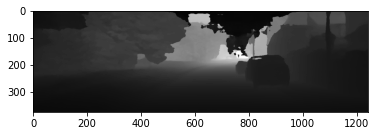

In [13]:
# Visualize Depthmap
import numpy as np
img_array = np.load('KITTI/testing/depth_maps/001018.npy')

from matplotlib import pyplot as plt

plt.imshow(img_array,cmap='gray')
plt.show()

In [14]:
# Saving Images
import numpy as np
from PIL import Image
import os

depthimage_save_path = "KITTI/testing/depth_maps_images/" 
if not os.path.exists(depthimage_save_path):
    os.makedirs(depthimage_save_path)
im_depth = Image.fromarray(img_array)
# im_depth.convert('RGB').save(depthimage_save_path+"depthmap_image.png")

### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
tensorboardx/ <br>
training.log <br>

- tensorboardsx , training.log are information about the model in wasserstien dissparity, Not needed in next steps.

## Part II - Pseudo Lidar V2
### Note:
- [Github link](https://github.com/mileyan/Pseudo_Lidar_V2.git)
- You don't have to clone it, it is already cloned.
- Wasserstien Disparity is part of Pseudo Lidar Github Project, as it is an improved Version of Neural Network, to increase the accuracy.
- So same steps in converting depthmaps to points cloud then Ground planes are the same like in Pseudo Lidar Github.

## Converting depthmaps to Points Cloud
- Inputs: calib, depth_maps.
- Output: points cloud
- Output location : KITTI/testing/velodyne/

In [15]:
# Convert depth maps to Pseudo-Lidar Point Clouds
!python3 ./W-Stereo-Disp/src/preprocess/generate_lidar_from_depth.py --calib_dir  "KITTI/testing/calib" \
    --depth_dir "KITTI/testing/depth_maps/"  \
    --save_dir  "KITTI/testing/velodyne/"

Finish Depth 000018
Finish Depth 000208
Finish Depth 001018
Finish Depth 003018


## Ground Planes

- Inputs : calib, points cloud.
- Outputs : Ground Planes.
- Output location : KITTI/testing/planes/ 

In [16]:
!python3 ./W-Stereo-Disp/src/preprocess/kitti_process_RANSAC.py --calib_dir  "KITTI/testing/calib" \
    --lidar_dir "KITTI/testing/velodyne" \
    --planes_dir  "KITTI/testing/planes"

-------------  000018
[-0.03474989 -0.99939333  0.00232954]
1.6608880528935357
-------------  000208
[-0.02786099 -0.99959738 -0.00536971]
1.6925237169981424
-------------  001018
[ 0.0067706  -0.99995769 -0.0062276 ]
1.6854644766741411
-------------  003018
[-0.008347   -0.9999646   0.00105879]
1.6716414888838078


### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
velodyne/ <br>
planes/ <br>
tensorboardx/ <br>
training.log <br>

# Stage-2 | Avod
- [Github Forked link](https://github.com/AhmedYousriSobhi/avod.git)
- You don't have to clone it, it is already cloned.

## Note:
- If this doesn't run, Remove CMakeCashe.txt from YOUR_PATH/avod/wavedata/wavedata/tools/core

In [17]:
!chmod +x ./avod/scripts/install/build_integral_image_lib.bash
!sh ./avod/scripts/install/build_integral_image_lib.bash

CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 2.8.12 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- The C compiler identification is GNU 7.5.0
-- The CXX compiler identification is GNU 7.5.0
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Detecting CXX compiler ABI info
-- Detecting CXX compiler ABI info - done
-- Check for working CXX compiler: /usr/bin/c++ - skipped
-- Detecting CXX compile features
-- Detecting CXX compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /content/BEV-Project/avod/wavedata/wavedata/tools/core/lib
[ 50%] Building CXX object CMakeFiles/integral_image

In [18]:
!sh ./avod/avod/protos/run_protoc.sh

Compiling protos in /content/BEV-Project/avod/avod/protos
[libprotobuf WARNING google/protobuf/compiler/parser.cc:547] No syntax specified for the proto file: avod/protos/kitti_dataset.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:547] No syntax specified for the proto file: avod/protos/kitti_utils.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:547] No syntax specified for the proto file: avod/protos/mini_batch.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a syntax version. (Defaulted to proto2 syntax.)
[libprotobuf WARNING google/protobuf/compiler/parser.cc:547] No syntax specified for the proto file: avod/protos/layers.proto. Please use 'syntax = "proto2";' or 'syntax = "proto3";' to specify a synt

### Downloading Checkpoints for Pretrianed Model.
### Note: This model is used to detect Cars Only.

In [19]:
# Checkpoints download
%mkdir avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
%cd avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
!gdown --id 1wuMykUDx8tcCfxpqnprmzrgUyheQV42F
!unzip avod.zip
%rm -r avod.zip
%cd ../../../../..

/content/BEV-Project/avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1wuMykUDx8tcCfxpqnprmzrgUyheQV42F
To: /content/BEV-Project/avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints/avod.zip
100% 248M/248M [00:05<00:00, 47.9MB/s]
Archive:  avod.zip
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.data-00000-of-00001  
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.index  
  inflating: pyramid_cars_with_aug_example_scratch_300_val-00120000.meta  
/content/BEV-Project/avod


### Use these Steps if The inferace cell doesn't work:
File: avod/avod/data/outputs/pyramid_cars_with_aug_example.config 
- in Line 136 - dataset_dir =  change your dataset location.
- in Line 137 - data_split = name of split txt file.
- in Line 139 - data_split_dir = "" -- Empty string.

File: avod/avod/datasets/kitti/kitti_dataset.py - in Line 76
- possible_splits = ['val']
- import sys
- sys.path.insert(1, 'PATH_TO_LOCATION/avod/wavedata')

File: avod/avod/core/evaluator.py - line 373:
- checkpoint_to_restore = 'PATH_TO_LOCATION/avod/avod/data/outputs/pyramid_cars_with_aug_example/checkpoints/pyramid_cars_with_aug_example_scratch_300_val-00120000'

In your dataset dir location, should have: 
- planes folder : output from pseudo-lidar-V2.
- velodyne folder : output from pseudo-lidar-V2.

In file ...... CHange output path.

Dataset testing used in wasserstien, training (testing) used in avod --> change.

## Run Inferance:
- Inputs : All Files in KITTI folder.
- Outputs : labels for car location to be used in Car detection.
- Output location : /avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/proposals_and_scores/val/120000
### Note: These labels needed to be converted to KITTI label format, So just keep these output files in their place.

In [20]:
%cd ..

/content/BEV-Project


In [21]:
!pip3 install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 438 kB 60.2 MB/s 
     |████████████████████████████████| 5.9 MB 57.7 MB/s 
     |████████████████████████████████| 1.7 MB 50.9 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 1.13.0
    Uninstalling tensorflow-estimator-1.13.0:
      Successfully uninstalled tensorflow-estimator-1.13.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 1.13.1
    Uninstalling tensorboard-1.13.1:
      Successfully uninstalled tensorboard-1.13.1
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled ga

In [22]:
# Run Inferance
!python3 avod/avod/experiments/run_inference.py --checkpoint_name='pyramid_cars_with_aug_example' --data_split='val' --ckpt_indices=120 --device='1'

2022-09-08 07:41:24.594354: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-08 07:41:24.779050: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-09-08 07:41:26.017772: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2022-09-08 07:41:26.017960: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open 

In [23]:
# !python3 avod/demos/show_predictions_2d.py

In [24]:
# !python3 avod/demos/kitti_bev_vis.py

# Stage-3 | Changing avod label format to KITTI label Format.
- Use Our Script to convert from Avod label format to KITTI label format, just like explaned in this [github](https://github.com/kujason/avod/wiki/Data-Formats)
- You can control the detection threshold by adding a --threshold < value >, defualt value is 0.02

In [25]:
!python3 to_kitti_format.py --avod_label_path "avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/final_predictions_and_scores/val/120000" \
        --save_path KITTI/testing/label_2

Namespace(avod_label_path='avod/avod/data/outputs/pyramid_cars_with_aug_example/predictions/final_predictions_and_scores/val/120000', save_path='KITTI/testing/label_2', threshold=0.02)
Opening FIle:  001018.txt
Opening FIle:  000208.txt
Opening FIle:  003018.txt
Opening FIle:  000018.txt
COMPLETED


### KITTI Folder Should Contains the following:
>KITTI/ <br>
>>val.txt <br>
testing/ <br>
>>>image_2/ <br>
image_3/ <br>
calib/ <br>
depth_maps/ <br>
velodyne/ <br>
planes/ <br>
label_2/ <br>
tensorboardx/ <br>
training.log <br>

# Stage-4 | Kitti Detect and Vis
- [Github Forked link](https://github.com/AhmedYousriSobhi/kitti_object_vis.git)
- You don't have to clone it, it is already cloned.

In [26]:
%cd /content/BEV-Project/kitti_object_vis

/content/BEV-Project/kitti_object_vis


In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
from kitti_object import kitti_object, show_lidar_with_depth, show_lidar_on_image, \
                         show_image_with_boxes, show_lidar_topview_with_boxes


In [28]:
!sudo apt-get install xvfb

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  xvfb
0 upgraded, 1 newly installed, 0 to remove and 19 not upgraded.
Need to get 785 kB of archives.
After this operation, 2,271 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 xvfb amd64 2:1.19.6-1ubuntu4.11 [785 kB]
Fetched 785 kB in 1s (1,441 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Telety

In [29]:
from xvfbwrapper import Xvfb
vdisplay = Xvfb(width=1920, height=1080)
vdisplay.start()
from mayavi import mlab
mlab.init_notebook('ipy') # do not use 'x3d' backend which leads to color missing

/usr/local/lib/python3.7/dist-packages/traits/etsconfig/etsconfig.py:428: UserWarning: Environment variable "HOME" not set, setting home directory to /tmp
  % (environment_variable, parent_directory)


Notebook initialized with ipy backend.


In [30]:
dataset = kitti_object("../KITTI", "testing")
# Number of image you want to visualize its BEV
data_idx = 1018
objects = dataset.get_label_objects(data_idx)
pc_velo = dataset.get_lidar(data_idx)
calib = dataset.get_calibration(data_idx)
img = dataset.get_image(data_idx)
img_height, img_width, _ = img.shape

fig_3d = mlab.figure(bgcolor=(0, 0, 0), size=(800, 450))
show_lidar_with_depth(pc_velo, objects, calib, fig_3d, True, img_width, img_height)
fig_3d

../KITTI testing
../KITTI/testing/velodyne/001018.bin
('All point num: ', 323621)
('FOV point num: ', (323587, 4))
pc_velo (323587, 4)
==================== (323587, 4)
box3d_pts_3d_velo:
[[ 1.33886553e+01 -2.93827584e+00 -1.59218515e+00]
 [ 1.33301372e+01 -4.59524376e+00 -1.61030508e+00]
 [ 9.37018192e+00 -4.45495610e+00 -1.65020648e+00]
 [ 9.42870006e+00 -2.79798818e+00 -1.63208654e+00]
 [ 1.33716636e+01 -2.95545606e+00  3.37254166e-02]
 [ 1.33131455e+01 -4.61242398e+00  1.56054820e-02]
 [ 9.35319024e+00 -4.47213632e+00 -2.42959116e-02]
 [ 9.41170838e+00 -2.81516840e+00 -6.17597700e-03]]
box3d_pts_3d_velo:
[[ 1.91335761e+01 -3.47768863e+00 -1.45080761e+00]
 [ 1.90829723e+01 -5.03842567e+00 -1.46782801e+00]
 [ 1.53122794e+01 -4.91575272e+00 -1.50593764e+00]
 [ 1.53628833e+01 -3.35501569e+00 -1.48891724e+00]
 [ 1.91179044e+01 -3.49353424e+00  4.87968897e-02]
 [ 1.90673006e+01 -5.05427127e+00  3.17764895e-02]
 [ 1.52966077e+01 -4.93159832e+00 -6.33313280e-03]
 [ 1.53472116e+01 -3.3708612

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x03 \x00\x00\x01\xc2\x08\x02\x00\x00\x00\x98\x01:\x9…

In [31]:
from google.colab.patches import cv2_imshow


In [32]:
""" Helper methods for loading and parsing KITTI data.

Author: Charles R. Qi, Kui Xu
Date: September 2017/2018
"""
from __future__ import print_function

import numpy as np
import cv2
import os, math
from scipy.optimize import leastsq
from PIL import Image

TOP_Y_MIN = -30
TOP_Y_MAX = +30
TOP_X_MIN = 0
TOP_X_MAX = 100
TOP_Z_MIN = -3.5
TOP_Z_MAX = 0.6

TOP_X_DIVISION = 0.2
TOP_Y_DIVISION = 0.2
TOP_Z_DIVISION = 0.3

cbox = np.array([[0, 70.4], [-40, 40], [-3, 2]])


class Object2d(object):
    """ 2d object label """

    def __init__(self, label_file_line):
        data = label_file_line.split(" ")

        # extract label, truncation, occlusion
        self.img_name = int(data[0])  # 'Car', 'Pedestrian', ...
        self.typeid = int(data[1])  # truncated pixel ratio [0..1]
        self.prob = float(data[2])
        self.box2d = np.array([int(data[3]), int(data[4]), int(data[5]), int(data[6])])

    def print_object(self):
        print(
            "img_name, typeid, prob: %s, %d, %f"
            % (self.img_name, self.typeid, self.prob)
        )
        print(
            "2d bbox (x0,y0,x1,y1): %d, %d, %d, %d"
            % (self.box2d[0], self.box2d[1], self.box2d[2], self.box2d[3])
        )


class Object3d(object):
    """ 3d object label """

    def __init__(self, label_file_line):
        data = label_file_line.split(" ")
        data[1:] = [float(x) for x in data[1:]]

        # extract label, truncation, occlusion
        self.type = data[0]  # 'Car', 'Pedestrian', ...
        self.truncation = data[1]  # truncated pixel ratio [0..1]
        self.occlusion = int(
            data[2]
        )  # 0=visible, 1=partly occluded, 2=fully occluded, 3=unknown
        self.alpha = data[3]  # object observation angle [-pi..pi]

        # extract 2d bounding box in 0-based coordinates
        self.xmin = data[4]  # left
        self.ymin = data[5]  # top
        self.xmax = data[6]  # right
        self.ymax = data[7]  # bottom
        self.box2d = np.array([self.xmin, self.ymin, self.xmax, self.ymax])

        # extract 3d bounding box information
        self.h = data[8]  # box height
        self.w = data[9]  # box width
        self.l = data[10]  # box length (in meters)
        self.t = (data[11], data[12], data[13])  # location (x,y,z) in camera coord.
        self.ry = data[14]  # yaw angle (around Y-axis in camera coordinates) [-pi..pi]

    def estimate_diffculty(self):
        """ Function that estimate difficulty to detect the object as defined in kitti website"""
        # height of the bounding box
        bb_height = np.abs(self.xmax - self.xmin)

        if bb_height >= 40 and self.occlusion == 0 and self.truncation <= 0.15:
            return "Easy"
        elif bb_height >= 25 and self.occlusion in [0, 1] and self.truncation <= 0.30:
            return "Moderate"
        elif (
            bb_height >= 25 and self.occlusion in [0, 1, 2] and self.truncation <= 0.50
        ):
            return "Hard"
        else:
            return "Unknown"

    def print_object(self):
        print(
            "Type, truncation, occlusion, alpha: %s, %d, %d, %f"
            % (self.type, self.truncation, self.occlusion, self.alpha)
        )
        print(
            "2d bbox (x0,y0,x1,y1): %f, %f, %f, %f"
            % (self.xmin, self.ymin, self.xmax, self.ymax)
        )
        print("3d bbox h,w,l: %f, %f, %f" % (self.h, self.w, self.l))
        print(
            "3d bbox location, ry: (%f, %f, %f), %f"
            % (self.t[0], self.t[1], self.t[2], self.ry)
        )
        print("Difficulty of estimation: {}".format(self.estimate_diffculty()))


class Calibration(object):
    """ Calibration matrices and utils
        3d XYZ in <label>.txt are in rect camera coord.
        2d box xy are in image2 coord
        Points in <lidar>.bin are in Velodyne coord.

        y_image2 = P^2_rect * x_rect
        y_image2 = P^2_rect * R0_rect * Tr_velo_to_cam * x_velo
        x_ref = Tr_velo_to_cam * x_velo
        x_rect = R0_rect * x_ref

        P^2_rect = [f^2_u,  0,      c^2_u,  -f^2_u b^2_x;
                    0,      f^2_v,  c^2_v,  -f^2_v b^2_y;
                    0,      0,      1,      0]
                 = K * [1|t]

        image2 coord:
         ----> x-axis (u)
        |
        |
        v y-axis (v)

        velodyne coord:
        front x, left y, up z

        rect/ref camera coord:
        right x, down y, front z

        Ref (KITTI paper): http://www.cvlibs.net/publications/Geiger2013IJRR.pdf

        TODO(rqi): do matrix multiplication only once for each projection.
    """

    def __init__(self, calib_filepath, from_video=False):
        if from_video:
            calibs = self.read_calib_from_video(calib_filepath)
        else:
            calibs = self.read_calib_file(calib_filepath)
        # Projection matrix from rect camera coord to image2 coord
        self.P = calibs["P2"]
        self.P = np.reshape(self.P, [3, 4])
        # Rigid transform from Velodyne coord to reference camera coord
        self.V2C = calibs["Tr_velo_to_cam"]
        self.V2C = np.reshape(self.V2C, [3, 4])
        self.C2V = inverse_rigid_trans(self.V2C)
        # Rotation from reference camera coord to rect camera coord
        self.R0 = calibs["R0_rect"]
        self.R0 = np.reshape(self.R0, [3, 3])

        # Camera intrinsics and extrinsics
        self.c_u = self.P[0, 2]
        self.c_v = self.P[1, 2]
        self.f_u = self.P[0, 0]
        self.f_v = self.P[1, 1]
        self.b_x = self.P[0, 3] / (-self.f_u)  # relative
        self.b_y = self.P[1, 3] / (-self.f_v)

    def read_calib_file(self, filepath):
        """ Read in a calibration file and parse into a dictionary.
        Ref: https://github.com/utiasSTARS/pykitti/blob/master/pykitti/utils.py
        """
        data = {}
        with open(filepath, "r") as f:
            for line in f.readlines():
                line = line.rstrip()
                if len(line) == 0:
                    continue
                key, value = line.split(":", 1)
                # The only non-float values in these files are dates, which
                # we don't care about anyway
                try:
                    data[key] = np.array([float(x) for x in value.split()])
                except ValueError:
                    pass

        return data

    def read_calib_from_video(self, calib_root_dir):
        """ Read calibration for camera 2 from video calib files.
            there are calib_cam_to_cam and calib_velo_to_cam under the calib_root_dir
        """
        data = {}
        cam2cam = self.read_calib_file(
            os.path.join(calib_root_dir, "calib_cam_to_cam.txt")
        )
        velo2cam = self.read_calib_file(
            os.path.join(calib_root_dir, "calib_velo_to_cam.txt")
        )
        Tr_velo_to_cam = np.zeros((3, 4))
        Tr_velo_to_cam[0:3, 0:3] = np.reshape(velo2cam["R"], [3, 3])
        Tr_velo_to_cam[:, 3] = velo2cam["T"]
        data["Tr_velo_to_cam"] = np.reshape(Tr_velo_to_cam, [12])
        data["R0_rect"] = cam2cam["R_rect_00"]
        data["P2"] = cam2cam["P_rect_02"]
        return data

    def cart2hom(self, pts_3d):
        """ Input: nx3 points in Cartesian
            Oupput: nx4 points in Homogeneous by pending 1
        """
        n = pts_3d.shape[0]
        pts_3d_hom = np.hstack((pts_3d, np.ones((n, 1))))
        return pts_3d_hom

    # ===========================
    # ------- 3d to 3d ----------
    # ===========================
    def project_velo_to_ref(self, pts_3d_velo):
        pts_3d_velo = self.cart2hom(pts_3d_velo)  # nx4
        return np.dot(pts_3d_velo, np.transpose(self.V2C))

    def project_ref_to_velo(self, pts_3d_ref):
        pts_3d_ref = self.cart2hom(pts_3d_ref)  # nx4
        return np.dot(pts_3d_ref, np.transpose(self.C2V))

    def project_rect_to_ref(self, pts_3d_rect):
        """ Input and Output are nx3 points """
        return np.transpose(np.dot(np.linalg.inv(self.R0), np.transpose(pts_3d_rect)))

    def project_ref_to_rect(self, pts_3d_ref):
        """ Input and Output are nx3 points """
        return np.transpose(np.dot(self.R0, np.transpose(pts_3d_ref)))

    def project_rect_to_velo(self, pts_3d_rect):
        """ Input: nx3 points in rect camera coord.
            Output: nx3 points in velodyne coord.
        """
        pts_3d_ref = self.project_rect_to_ref(pts_3d_rect)
        return self.project_ref_to_velo(pts_3d_ref)

    def project_velo_to_rect(self, pts_3d_velo):
        pts_3d_ref = self.project_velo_to_ref(pts_3d_velo)
        return self.project_ref_to_rect(pts_3d_ref)

    # ===========================
    # ------- 3d to 2d ----------
    # ===========================
    def project_rect_to_image(self, pts_3d_rect):
        """ Input: nx3 points in rect camera coord.
            Output: nx2 points in image2 coord.
        """
        pts_3d_rect = self.cart2hom(pts_3d_rect)
        pts_2d = np.dot(pts_3d_rect, np.transpose(self.P))  # nx3
        pts_2d[:, 0] /= pts_2d[:, 2]
        pts_2d[:, 1] /= pts_2d[:, 2]
        return pts_2d[:, 0:2]

    def project_velo_to_image(self, pts_3d_velo):
        """ Input: nx3 points in velodyne coord.
            Output: nx2 points in image2 coord.
        """
        pts_3d_rect = self.project_velo_to_rect(pts_3d_velo)
        return self.project_rect_to_image(pts_3d_rect)

    def project_8p_to_4p(self, pts_2d):
        x0 = np.min(pts_2d[:, 0])
        x1 = np.max(pts_2d[:, 0])
        y0 = np.min(pts_2d[:, 1])
        y1 = np.max(pts_2d[:, 1])
        x0 = max(0, x0)
        # x1 = min(x1, proj.image_width)
        y0 = max(0, y0)
        # y1 = min(y1, proj.image_height)
        return np.array([x0, y0, x1, y1])

    def project_velo_to_4p(self, pts_3d_velo):
        """ Input: nx3 points in velodyne coord.
            Output: 4 points in image2 coord.
        """
        pts_2d_velo = self.project_velo_to_image(pts_3d_velo)
        return self.project_8p_to_4p(pts_2d_velo)

    # ===========================
    # ------- 2d to 3d ----------
    # ===========================
    def project_image_to_rect(self, uv_depth):
        """ Input: nx3 first two channels are uv, 3rd channel
                   is depth in rect camera coord.
            Output: nx3 points in rect camera coord.
        """
        n = uv_depth.shape[0]
        x = ((uv_depth[:, 0] - self.c_u) * uv_depth[:, 2]) / self.f_u + self.b_x
        y = ((uv_depth[:, 1] - self.c_v) * uv_depth[:, 2]) / self.f_v + self.b_y
        pts_3d_rect = np.zeros((n, 3))
        pts_3d_rect[:, 0] = x
        pts_3d_rect[:, 1] = y
        pts_3d_rect[:, 2] = uv_depth[:, 2]
        return pts_3d_rect

    def project_image_to_velo(self, uv_depth):
        pts_3d_rect = self.project_image_to_rect(uv_depth)
        return self.project_rect_to_velo(pts_3d_rect)

    def project_depth_to_velo(self, depth, constraint_box=True):
        depth_pt3d = get_depth_pt3d(depth)
        depth_UVDepth = np.zeros_like(depth_pt3d)
        depth_UVDepth[:, 0] = depth_pt3d[:, 1]
        depth_UVDepth[:, 1] = depth_pt3d[:, 0]
        depth_UVDepth[:, 2] = depth_pt3d[:, 2]
        # print("depth_pt3d:",depth_UVDepth.shape)
        depth_pc_velo = self.project_image_to_velo(depth_UVDepth)
        # print("dep_pc_velo:",depth_pc_velo.shape)
        if constraint_box:
            depth_box_fov_inds = (
                (depth_pc_velo[:, 0] < cbox[0][1])
                & (depth_pc_velo[:, 0] >= cbox[0][0])
                & (depth_pc_velo[:, 1] < cbox[1][1])
                & (depth_pc_velo[:, 1] >= cbox[1][0])
                & (depth_pc_velo[:, 2] < cbox[2][1])
                & (depth_pc_velo[:, 2] >= cbox[2][0])
            )
            depth_pc_velo = depth_pc_velo[depth_box_fov_inds]
        return depth_pc_velo


def get_depth_pt3d(depth):
    pt3d = []
    for i in range(depth.shape[0]):
        for j in range(depth.shape[1]):
            pt3d.append([i, j, depth[i, j]])
    return np.array(pt3d)


def rotx(t):
    """ 3D Rotation about the x-axis. """
    c = np.cos(t)
    s = np.sin(t)
    return np.array([[1, 0, 0], [0, c, -s], [0, s, c]])


def roty(t):
    """ Rotation about the y-axis. """
    c = np.cos(t)
    s = np.sin(t)
    return np.array([[c, 0, s], [0, 1, 0], [-s, 0, c]])


def rotz(t):
    """ Rotation about the z-axis. """
    c = np.cos(t)
    s = np.sin(t)
    return np.array([[c, -s, 0], [s, c, 0], [0, 0, 1]])


def transform_from_rot_trans(R, t):
    """ Transforation matrix from rotation matrix and translation vector. """
    R = R.reshape(3, 3)
    t = t.reshape(3, 1)
    return np.vstack((np.hstack([R, t]), [0, 0, 0, 1]))


def inverse_rigid_trans(Tr):
    """ Inverse a rigid body transform matrix (3x4 as [R|t])
        [R'|-R't; 0|1]
    """
    inv_Tr = np.zeros_like(Tr)  # 3x4
    inv_Tr[0:3, 0:3] = np.transpose(Tr[0:3, 0:3])
    inv_Tr[0:3, 3] = np.dot(-np.transpose(Tr[0:3, 0:3]), Tr[0:3, 3])
    return inv_Tr


def read_label(label_filename):
    lines = [line.rstrip() for line in open(label_filename)]
    objects = [Object3d(line) for line in lines]
    return objects


def load_image(img_filename):
    return cv2.imread(img_filename)


def load_depth_v(img_filename):
    # return cv2.imread(img_filename)
    disp_img = cv2.imread(img_filename, cv2.IMREAD_UNCHANGED)
    disp_img = disp_img.astype(np.float)
    return disp_img / 256.0


def load_depth0(img_filename):
    # return cv2.imread(img_filename)
    depth_img = np.array(Image.open(img_filename), dtype=int)

    depth_img = depth_img.astype(np.float) / 256.0

    return depth_img


def load_depth(img_filename):
    isexist = True
    disp_img = cv2.imread(img_filename, cv2.IMREAD_UNCHANGED)
    if disp_img is None:
        isexist = False
        disp_img = np.zeros((370, 1224))
    else:
        disp_img = disp_img.astype(np.float)
    return disp_img / 256.0, isexist


def load_velo_scan(velo_filename, dtype=np.float32, n_vec=4):
    scan = np.fromfile(velo_filename, dtype=dtype)
    scan = scan.reshape((-1, n_vec))
    return scan


def lidar_to_top_coords(x, y):
    # print("TOP_X_MAX-TOP_X_MIN:",TOP_X_MAX,TOP_X_MIN)
    Xn = int((TOP_X_MAX - TOP_X_MIN) // TOP_X_DIVISION) + 1
    Yn = int((TOP_Y_MAX - TOP_Y_MIN) // TOP_Y_DIVISION) + 1
    xx = Yn - int((y - TOP_Y_MIN) // TOP_Y_DIVISION)
    yy = Xn - int((x - TOP_X_MIN) // TOP_X_DIVISION)

    return xx, yy


def lidar_to_top(lidar):

    idx = np.where(lidar[:, 0] > TOP_X_MIN)
    lidar = lidar[idx]
    idx = np.where(lidar[:, 0] < TOP_X_MAX)
    lidar = lidar[idx]

    idx = np.where(lidar[:, 1] > TOP_Y_MIN)
    lidar = lidar[idx]
    idx = np.where(lidar[:, 1] < TOP_Y_MAX)
    lidar = lidar[idx]

    idx = np.where(lidar[:, 2] > TOP_Z_MIN)
    lidar = lidar[idx]
    idx = np.where(lidar[:, 2] < TOP_Z_MAX)
    lidar = lidar[idx]

    pxs = lidar[:, 0]
    pys = lidar[:, 1]
    pzs = lidar[:, 2]
    prs = lidar[:, 3]
    qxs = ((pxs - TOP_X_MIN) // TOP_X_DIVISION).astype(np.int32)
    qys = ((pys - TOP_Y_MIN) // TOP_Y_DIVISION).astype(np.int32)
    # qzs=((pzs-TOP_Z_MIN)//TOP_Z_DIVISION).astype(np.int32)
    qzs = (pzs - TOP_Z_MIN) / TOP_Z_DIVISION
    quantized = np.dstack((qxs, qys, qzs, prs)).squeeze()

    X0, Xn = 0, int((TOP_X_MAX - TOP_X_MIN) // TOP_X_DIVISION) + 1
    Y0, Yn = 0, int((TOP_Y_MAX - TOP_Y_MIN) // TOP_Y_DIVISION) + 1
    Z0, Zn = 0, int((TOP_Z_MAX - TOP_Z_MIN) / TOP_Z_DIVISION)
    height = Xn - X0
    width = Yn - Y0
    channel = Zn - Z0 + 2
    # print('height,width,channel=%d,%d,%d'%(height,width,channel))
    top = np.zeros(shape=(height, width, channel), dtype=np.float32)

    # histogram = Bin(channel, 0, Zn, "z", Bin(height, 0, Yn, "y", Bin(width, 0, Xn, "x", Maximize("intensity"))))
    # histogram.fill.numpy({"x": qxs, "y": qys, "z": qzs, "intensity": prs})

    if 1:  # new method
        for x in range(Xn):
            ix = np.where(quantized[:, 0] == x)
            quantized_x = quantized[ix]
            if len(quantized_x) == 0:
                continue
            yy = -x

            for y in range(Yn):
                iy = np.where(quantized_x[:, 1] == y)
                quantized_xy = quantized_x[iy]
                count = len(quantized_xy)
                if count == 0:
                    continue
                xx = -y

                top[yy, xx, Zn + 1] = min(1, np.log(count + 1) / math.log(32))
                max_height_point = np.argmax(quantized_xy[:, 2])
                top[yy, xx, Zn] = quantized_xy[max_height_point, 3]

                for z in range(Zn):
                    iz = np.where(
                        (quantized_xy[:, 2] >= z) & (quantized_xy[:, 2] <= z + 1)
                    )
                    quantized_xyz = quantized_xy[iz]
                    if len(quantized_xyz) == 0:
                        continue
                    zz = z

                    # height per slice
                    max_height = max(0, np.max(quantized_xyz[:, 2]) - z)
                    top[yy, xx, zz] = max_height

    # if 0: #unprocess
    #     top_image = np.zeros((height,width,3),dtype=np.float32)
    #
    #     num = len(lidar)
    #     for n in range(num):
    #         x,y = qxs[n],qys[n]
    #         if x>=0 and x <width and y>0 and y<height:
    #             top_image[y,x,:] += 1
    #
    #     max_value=np.max(np.log(top_image+0.001))
    #     top_image = top_image/max_value *255
    #     top_image=top_image.astype(dtype=np.uint8)

    return top


MATRIX_Mt = np.array(
    [
        [2.34773698e-04, 1.04494074e-02, 9.99945389e-01, 0.00000000e00],
        [-9.99944155e-01, 1.05653536e-02, 1.24365378e-04, 0.00000000e00],
        [-1.05634778e-02, -9.99889574e-01, 1.04513030e-02, 0.00000000e00],
        [5.93721868e-02, -7.51087914e-02, -2.72132796e-01, 1.00000000e00],
    ]
)

MATRIX_Kt = np.array(
    [[721.5377, 0.0, 0.0], [0.0, 721.5377, 0.0], [609.5593, 172.854, 1.0]]
)


def box3d_to_rgb_box00(box3d):

    # box3d = boxes3d[n]
    Ps = np.hstack((box3d, np.ones((8, 1))))
    Qs = np.matmul(Ps, MATRIX_Mt)
    Qs = Qs[:, 0:3]
    qs = np.matmul(Qs, MATRIX_Kt)
    zs = qs[:, 2].reshape(8, 1)
    qs = qs / zs

    return qs[:, 0:2]


def box3d_to_rgb_box0000(boxes3d, Mt=None, Kt=None):
    # if (cfg.DATA_SETS_TYPE == 'kitti'):
    if Mt is None:
        Mt = np.array(MATRIX_Mt)
    if Kt is None:
        Kt = np.array(MATRIX_Kt)

    num = len(boxes3d)
    projections = np.zeros((num, 8, 2), dtype=np.int32)
    for n in range(num):
        box3d = boxes3d[n]
        Ps = np.hstack((box3d, np.ones((8, 1))))
        Qs = np.matmul(Ps, Mt)
        Qs = Qs[:, 0:3]
        qs = np.matmul(Qs, Kt)
        zs = qs[:, 2].reshape(8, 1)
        qs = qs / zs
        # pts_3d=project_to_image(qs[:,0:2], P)
        projections[n] = qs[:, 0:2]
        # projections[n] = proj3d_to_2d(qs[:,0:2])
        # projections[n] = pts_3d
    return projections


def proj3d_to_2d(rgbpoint):
    x0 = np.min(rgbpoint[:, 0])
    x1 = np.max(rgbpoint[:, 0])
    y0 = np.min(rgbpoint[:, 1])
    y1 = np.max(rgbpoint[:, 1])
    # x0 = max(0,x0)
    # x1 = min(x1, proj.image_width)
    # y0 = max(0,y0)
    # y1 = min(y1, proj.image_height)
    return np.array([x0, y0, x1, y1])


def project_to_image(pts_3d, P):
    """ Project 3d points to image plane.

    Usage: pts_2d = projectToImage(pts_3d, P)
      input: pts_3d: nx3 matrix
             P:      3x4 projection matrix
      output: pts_2d: nx2 matrix

      P(3x4) dot pts_3d_extended(4xn) = projected_pts_2d(3xn)
      => normalize projected_pts_2d(2xn)

      <=> pts_3d_extended(nx4) dot P'(4x3) = projected_pts_2d(nx3)
          => normalize projected_pts_2d(nx2)
    """
    n = pts_3d.shape[0]
    pts_3d_extend = np.hstack((pts_3d, np.ones((n, 1))))
    # print(('pts_3d_extend shape: ', pts_3d_extend.shape))
    pts_2d = np.dot(pts_3d_extend, np.transpose(P))  # nx3
    pts_2d[:, 0] /= pts_2d[:, 2]
    pts_2d[:, 1] /= pts_2d[:, 2]
    return pts_2d[:, 0:2]


def compute_box_3d(obj, P):
    """ Takes an object and a projection matrix (P) and projects the 3d
        bounding box into the image plane.
        Returns:
            corners_2d: (8,2) array in left image coord.
            corners_3d: (8,3) array in in rect camera coord.
    """
    # compute rotational matrix around yaw axis
    R = roty(obj.ry)

    # 3d bounding box dimensions
    l = obj.l
    w = obj.w
    h = obj.h

    # 3d bounding box corners
    x_corners = [l / 2, l / 2, -l / 2, -l / 2, l / 2, l / 2, -l / 2, -l / 2]
    y_corners = [0, 0, 0, 0, -h, -h, -h, -h]
    z_corners = [w / 2, -w / 2, -w / 2, w / 2, w / 2, -w / 2, -w / 2, w / 2]

    # rotate and translate 3d bounding box
    corners_3d = np.dot(R, np.vstack([x_corners, y_corners, z_corners]))
    # print corners_3d.shape
    corners_3d[0, :] = corners_3d[0, :] + obj.t[0]
    corners_3d[1, :] = corners_3d[1, :] + obj.t[1]
    corners_3d[2, :] = corners_3d[2, :] + obj.t[2]
    # print 'cornsers_3d: ', corners_3d
    # only draw 3d bounding box for objs in front of the camera
    if np.any(corners_3d[2, :] < 0.1):
        corners_2d = None
        return corners_2d, np.transpose(corners_3d)

    # project the 3d bounding box into the image plane
    corners_2d = project_to_image(np.transpose(corners_3d), P)
    # print 'corners_2d: ', corners_2d
    return corners_2d, np.transpose(corners_3d)


def compute_orientation_3d(obj, P):
    """ Takes an object and a projection matrix (P) and projects the 3d
        object orientation vector into the image plane.
        Returns:
            orientation_2d: (2,2) array in left image coord.
            orientation_3d: (2,3) array in in rect camera coord.
    """

    # compute rotational matrix around yaw axis
    R = roty(obj.ry)

    # orientation in object coordinate system
    orientation_3d = np.array([[0.0, obj.l], [0, 0], [0, 0]])

    # rotate and translate in camera coordinate system, project in image
    orientation_3d = np.dot(R, orientation_3d)
    orientation_3d[0, :] = orientation_3d[0, :] + obj.t[0]
    orientation_3d[1, :] = orientation_3d[1, :] + obj.t[1]
    orientation_3d[2, :] = orientation_3d[2, :] + obj.t[2]

    # vector behind image plane?
    if np.any(orientation_3d[2, :] < 0.1):
        orientation_2d = None
        return orientation_2d, np.transpose(orientation_3d)

    # project orientation into the image plane
    orientation_2d = project_to_image(np.transpose(orientation_3d), P)
    return orientation_2d, np.transpose(orientation_3d)


def draw_projected_box3d(image, qs, color=(0, 255, 0), thickness=2):
    """ Draw 3d bounding box in image
        qs: (8,3) array of vertices for the 3d box in following order:
            1 -------- 0
           /|         /|
          2 -------- 3 .
          | |        | |
          . 5 -------- 4
          |/         |/
          6 -------- 7
    """
    qs = qs.astype(np.int32)
    for k in range(0, 4):
        # Ref: http://docs.enthought.com/mayavi/mayavi/auto/mlab_helper_functions.html
        i, j = k, (k + 1) % 4
        # use LINE_AA for opencv3
        # cv2.line(image, (qs[i,0],qs[i,1]), (qs[j,0],qs[j,1]), color, thickness, cv2.CV_AA)
        cv2.line(image, (qs[i, 0], qs[i, 1]), (qs[j, 0], qs[j, 1]), color, thickness)
        i, j = k + 4, (k + 1) % 4 + 4
        cv2.line(image, (qs[i, 0], qs[i, 1]), (qs[j, 0], qs[j, 1]), color, thickness)

        i, j = k, k + 4
        cv2.line(image, (qs[i, 0], qs[i, 1]), (qs[j, 0], qs[j, 1]), color, thickness)
    return image


def draw_top_image(lidar_top):
    top_image = np.sum(lidar_top, axis=2)
    top_image = top_image - np.min(top_image)
    divisor = np.max(top_image) - np.min(top_image)
    top_image = top_image / divisor * 255
    top_image = np.dstack((top_image, top_image, top_image)).astype(np.uint8)
    return top_image


def draw_box3d_on_top(
    image,
    boxes3d,
    color=(255, 255, 255),
    thickness=1,
    scores=None,
    text_lables=[],
    is_gt=False,
):

    # if scores is not None and scores.shape[0] >0:
    # print(scores.shape)
    # scores=scores[:,0]
    font = cv2.FONT_HERSHEY_SIMPLEX
    img = image.copy()
    num = len(boxes3d)
    startx = 5
    for n in range(num):
        b = boxes3d[n]
        x0 = b[0, 0]
        y0 = b[0, 1]
        x1 = b[1, 0]
        y1 = b[1, 1]
        x2 = b[2, 0]
        y2 = b[2, 1]
        x3 = b[3, 0]
        y3 = b[3, 1]
        u0, v0 = lidar_to_top_coords(x0, y0)
        u1, v1 = lidar_to_top_coords(x1, y1)
        u2, v2 = lidar_to_top_coords(x2, y2)
        u3, v3 = lidar_to_top_coords(x3, y3)
        if is_gt:
            color = (0, 255, 0)
            startx = 5
        else:
            color = heat_map_rgb(0.0, 1.0, scores[n]) if scores is not None else 255
            startx = 85
        cv2.line(img, (u0, v0), (u1, v1), color, thickness, cv2.LINE_AA)
        cv2.line(img, (u1, v1), (u2, v2), color, thickness, cv2.LINE_AA)
        cv2.line(img, (u2, v2), (u3, v3), color, thickness, cv2.LINE_AA)
        cv2.line(img, (u3, v3), (u0, v0), color, thickness, cv2.LINE_AA)
    for n in range(len(text_lables)):
        text_pos = (startx, 25 * (n + 1))
        cv2.putText(img, text_lables[n], text_pos, font, 0.5, color, 0, cv2.LINE_AA)
    return img


# hypothesis function
def hypothesis_func(w, x):
    w1, w0 = w
    return w1 * x + w0


# error function
def error_func(w, train_x, train_y):
    return hypothesis_func(w, train_x) - train_y


def dump_fit_func(w_fit):
    w1, w0 = w_fit
    print("fitting line=", str(w1) + "*x + " + str(w0))
    return


# square error
def dump_fit_cost(w_fit, train_x, train_y):
    error = error_func(w_fit, train_x, train_y)
    square_error = sum(e * e for e in error)
    print("fitting cost:", str(square_error))
    return square_error


def linear_regression(train_x, train_y, test_x):
    # train set
    # train_x = np.array([8.19,2.72,6.39,8.71,4.7,2.66,3.78])
    # train_y = np.array([7.01,2.78,6.47,6.71,4.1,4.23,4.05])

    # linear regression by leastsq
    # msg = "invoke scipy leastsq"
    w_init = [20, 1]  # weight factor init
    fit_ret = leastsq(error_func, w_init, args=(train_x, train_y))
    w_fit = fit_ret[0]

    # dump fit result
    dump_fit_func(w_fit)
    dump_fit_cost(w_fit, train_x, train_y)

    # test set
    # test_x = np.array(np.arange(train_x.min(), train_x.max(), 1.0))
    test_y = hypothesis_func(w_fit, test_x)
    test_y0 = hypothesis_func(w_fit, train_x)
    return test_y, test_y0


In [33]:
def show_image_with_boxes(img, objects, calib, show3d=True, depth=None):
    """ Show image with 2D bounding boxes """
    img1 = np.copy(img)  # for 2d bbox
    img2 = np.copy(img)  # for 3d bbox
    #img3 = np.copy(img)  # for 3d bbox
    #TODO: change the color of boxes
    for obj in objects:
        if obj.type == "DontCare":
            continue
        if obj.type == "Car":
            cv2.rectangle(
            img1,
            (int(obj.xmin), int(obj.ymin)),
            (int(obj.xmax), int(obj.ymax)),
            (0, 255, 0),
            2,
        )
        if obj.type == "Pedestrian":
            cv2.rectangle(
            img1,
            (int(obj.xmin), int(obj.ymin)),
            (int(obj.xmax), int(obj.ymax)),
            (255, 255, 0),
            2,
        )
        if obj.type == "Cyclist":
            cv2.rectangle(
            img1,
            (int(obj.xmin), int(obj.ymin)),
            (int(obj.xmax), int(obj.ymax)),
            (0, 255, 255),
            2,
        )
        box3d_pts_2d, _ = compute_box_3d(obj, calib.P)
        if box3d_pts_2d is None:
            print("something wrong in the 3D box.")
            continue
        if obj.type == "Car":
            img2 = draw_projected_box3d(img2, box3d_pts_2d, color=(0, 255, 0))
        elif obj.type == "Pedestrian":
            img2 = draw_projected_box3d(img2, box3d_pts_2d, color=(255, 255, 0))
        elif obj.type == "Cyclist":
            img2 = draw_projected_box3d(img2, box3d_pts_2d, color=(0, 255, 255))


        # project
        # box3d_pts_3d_velo = calib.project_rect_to_velo(box3d_pts_3d)
        # box3d_pts_32d = utils.box3d_to_rgb_box00(box3d_pts_3d_velo)
        # box3d_pts_32d = calib.project_velo_to_image(box3d_pts_3d_velo)
        # img3 = utils.draw_projected_box3d(img3, box3d_pts_32d)
    # print("img1:", img1.shape)
    cv2_imshow(img1)
    # print("img3:",img3.shape)
    # Image.fromarray(img3).show()
    show3d = True
    if show3d:
        # print("img2:",img2.shape)
        cv2_imshow(img2)
    if depth is not None:
        cv2_imshow(depth)
    
    return img1, img2

In [34]:
!sudo apt-get install tesseract-ocr


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 19 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr amd64 4.00~git2288-10f4998a-2 [218 kB]
Fetched 4,795 kB in 1s (5,984 kB/s)
debconf: unable to initi

In [35]:
!pip install pytesseract==0.3.9


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.1 MB 8.0 MB/s 
  Attempting uninstall: Pillow
    Found existing installation: Pillow 6.2.0
    Uninstalling Pillow-6.2.0:
      Successfully uninstalled Pillow-6.2.0


KeyError: ignored

<PIL.Image.Image image mode=RGB size=1242x375 at 0x7F46DD52D8D0>

KeyError: ignored

<PIL.Image.Image image mode=RGB size=1242x375 at 0x7F46CFF76050>

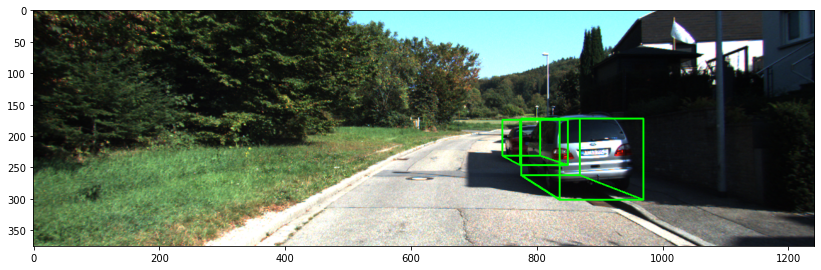

In [36]:
_, img_bbox3d = show_image_with_boxes(img, objects, calib)
img_bbox3d = cv2.cvtColor(img_bbox3d, cv2.COLOR_BGR2RGB)

fig_bbox3d = plt.figure(figsize=(14, 7))
ax_bbox3d = fig_bbox3d.subplots()
ax_bbox3d.imshow(img_bbox3d)
plt.show()

In [37]:
def show_lidar_topview_with_boxes(pc_velo, objects, calib, objects_pred=None):
    """ top_view image"""
    # print('pc_velo shape: ',pc_velo.shape)
    top_view = lidar_to_top(pc_velo)
    top_image = draw_top_image(top_view)
    print("top_image:", top_image.shape)
    # gt

    def bbox3d(obj):
        _, box3d_pts_3d = compute_box_3d(obj, calib.P)
        box3d_pts_3d_velo = calib.project_rect_to_velo(box3d_pts_3d)
        return box3d_pts_3d_velo

    boxes3d = [bbox3d(obj) for obj in objects if obj.type != "DontCare"]
    gt = np.array(boxes3d)
    # print("box2d BV:",boxes3d)
    lines = [obj.type for obj in objects if obj.type != "DontCare"]
    top_image = draw_box3d_on_top(
        top_image, gt, text_lables=lines, scores=None, thickness=1, is_gt=True
    )
    # pred
    if objects_pred is not None:
        boxes3d = [bbox3d(obj) for obj in objects_pred if obj.type != "DontCare"]
        gt = np.array(boxes3d)
        lines = [obj.type for obj in objects_pred if obj.type != "DontCare"]
        top_image = draw_box3d_on_top(
            top_image, gt, text_lables=lines, scores=None, thickness=1, is_gt=False
        )

    cv2_imshow( top_image)
    return top_image

top_image: (500, 300, 3)


KeyError: ignored

<PIL.Image.Image image mode=RGB size=300x500 at 0x7F4692EE3F90>

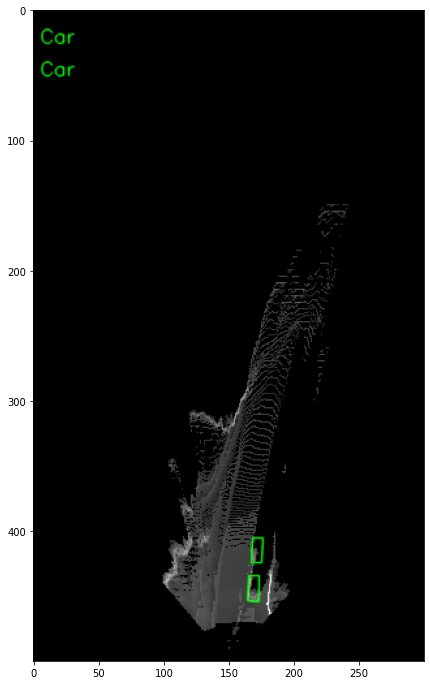

In [38]:
img_bev = show_lidar_topview_with_boxes(pc_velo, objects, calib)

fig_bev = plt.figure(figsize=(7, 14))
ax_bev = fig_bev.subplots()
ax_bev.imshow(img_bev)
plt.show()

In [39]:
# # Saving Images
# import numpy as np
# from PIL import Image
# import os

# depthimage_save_path = "../KITTI/testing/BEV_3D_images/" 
# if not os.path.exists(depthimage_save_path):
#     os.makedirs(depthimage_save_path)
    
# im_3DBOX = Image.fromarray(img_bbox3d)
# im_BEV = Image.fromarray(img_bev)
# im_3DBOX.save(depthimage_save_path+"3D_BOX_"+str(data_idx)+".jpeg")
# im_BEV.save(depthimage_save_path+"BEV_"+str(data_idx)+".jpeg")

In [40]:
pwd

'/content/BEV-Project/kitti_object_vis'

In [49]:
!python --version

Python 3.7.13


In [56]:
!pipreqs . 

INFO: Successfully saved requirements file in ./requirements.txt


In [57]:
! cd /content/BEV-Project/W-Stereo-Disp

In [58]:
!pipreqs . 